# Phase transition in connection length

In [1]:
import numpy as np
import matplotlib.pyplot as plt

BoxLength = 60
R = 20
filename = "SV_R" + str(R) + "_BS" + str(BoxLength) + "_c.cat"

catalog = np.loadtxt(filename)

X = catalog[:,0]
Y = catalog[:,1]
Z = catalog[:,2]

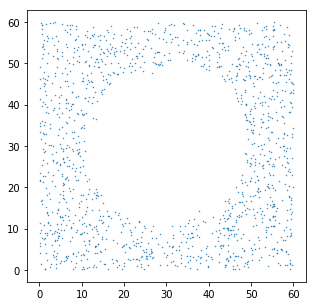

In [2]:
index = np.where( abs(catalog[:,2] - BoxLength / 2) < R / 2 )


fig = plt.figure(figsize=[5,5])
plt.scatter(catalog[index,0], catalog[index,1], s=0.2)

In [3]:
"""
Beta_list = [ "0.3",  "0.4",  "0.5",  "0.6",  "0.7",  "0.8",  "0.9",  "0.92", "0.94", "0.96", "0.98", 
            "0.99", "1.0" ,  "1.1",  "1.2",  "1.3",
        "1.4",  "1.5",  "1.6",  "1.7",  "1.8",  "1.9",  "2.0" ,  "2.1",  "2.2",  "2.3",  "2.4",
        "2.5",  "2.6",  "2.7",  "2.8",  "2.9",  "3.0" ,  "3.2",  "3.4",  "3.6",  "3.8",  "4.0" ,
        "4.5",  "5.0" ,  "5.5",  "6.0" ,  "7.0" ,  "8.0" ,  "9.0" , "10.0"]
"""
Beta_list = [ "0.99", "1.0"]

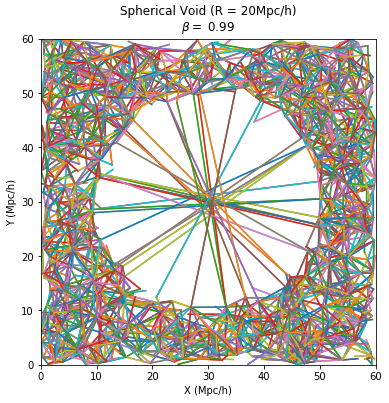

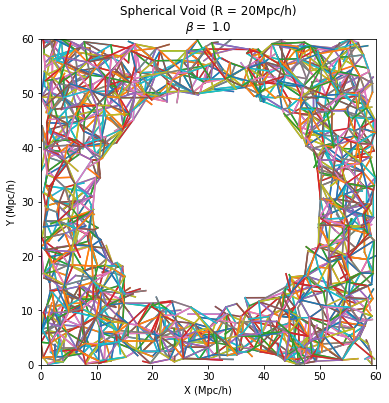

In [4]:
for m in range(len(Beta_list)):
    beta_x = np.loadtxt("SV_R20_BS60_B_" + Beta_list[m] + ".bsk")

    fig = plt.figure(figsize=(6,6))
    for k in beta_x:
        i = int(k[0])
        j = int(k[1])
        if ( (abs(Z[i] - BoxLength / 2) < R / 4) or (abs(Z[j] - BoxLength / 2) < R / 4) ) :
            plt.plot( (X[i],X[j]), (Y[i],Y[j]) )
        # print(k)
    plt.xlim(0,BoxLength)
    plt.ylim(0,BoxLength)

    plt.title("Spherical Void (R = 20Mpc/h)\n" + r"$\beta =$ " + Beta_list[m])

    plt.xlabel("X (Mpc/h)")
    plt.ylabel("Y (Mpc/h)")


    plt.savefig( "beta_" + Beta_list[m] + ".png" )
    
    #plt.close()

In [5]:
a = np.loadtxt("SV_R20_BS60_B_0.99.bsk")
b = np.loadtxt("SV_R20_BS60_B_1.0.bsk")

In [8]:
a = a.astype(int)
b = b.astype(int)

# Number of connections per point

In [9]:
a_connections = []
b_connections = []

for i in range( catalog.shape[0] ):
    a_connections.append(np.where(a[:,0]==i)[0].shape[0])
    b_connections.append(np.where(b[:,0]==i)[0].shape[0])

Text(0.5,1,'Connections per point')

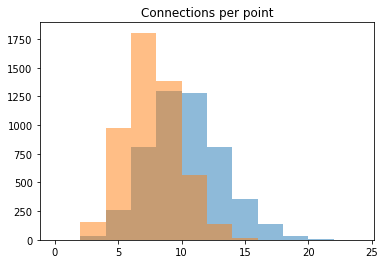

In [10]:
bins = np.linspace(0,24,13)

plt.hist( a_connections, bins, alpha=0.5, label=r"$\beta=0.99$")
plt.hist( b_connections, bins, alpha=0.5, label=r"$\beta=1.0$")
plt.title("Connections per point")

 # Connection Length

In [11]:
def distance(p1,p2):
    r = 0
    for i in range(3):
        r += (p1[i]-p2[i])**2
    return ( r )**0.5

In [37]:
a_dist = []
b_dist = []

for k in a:
    a_dist.append( distance( catalog[k[0]], catalog[k[1]]) )
    
for k in b:
    b_dist.append( distance( catalog[k[0]], catalog[k[1]]) )    
    
a_dist = np.array(a_dist)
b_dist = np.array(b_dist)


Text(0.5,1,'Connection Length')

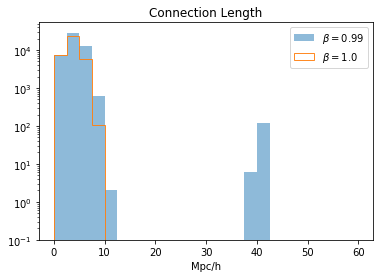

In [38]:
bins = np.linspace(0,60,25)

plt.hist( a_dist, bins, log=True, alpha=0.5, label=r"$\beta=0.99$")
plt.hist( b_dist, bins, log=True, alpha=0.9, label=r"$\beta=1.0$", histtype="step")
plt.xlabel("Mpc/h")
plt.legend()
plt.title("Connection Length")

# Where Connection Length (@ $\beta = 0.99$) is above Mean Length (@ $\beta = 1.0$)

In [39]:
index = np.where( (a_dist[:] > 30) )

In [40]:
index

(array([  412,  1088,  1164,  1165,  1960,  2598,  2604,  2605,  3068,
         3478,  3493,  3494,  3495,  4452,  4515,  4794,  4795,  4796,
         5475,  5476,  5513,  5514,  5645,  5779,  6605,  6664,  7033,
         7176,  7318,  7445,  7446, 10558, 10559, 10691, 11119, 11120,
        11455, 11456, 11488, 11966, 11967, 11968, 11969, 12670, 12688,
        12794, 13837, 13838, 14963, 14964, 15528, 16037, 16038, 16039,
        16320, 16974, 16975, 17050, 17981, 17982, 17983, 19762, 21094,
        21475, 21600, 21960, 22402, 25545, 25546, 25915, 26001, 28987,
        28988, 29116, 29117, 30324, 30724, 30950, 31407, 32584, 32926,
        33411, 33412, 33413, 33556, 33764, 33765, 33766, 34722, 34723,
        34724, 34992, 34993, 34994, 34995, 35030, 35998, 35999, 36000,
        37173, 37174, 37175, 37496, 38742, 38743, 38744, 38745, 38812,
        39343, 39415, 41073, 41074, 41392, 42009, 42815, 42839, 42913,
        42914, 43423, 43914, 45481, 46026, 47779, 47780, 47781, 48491,
      

In [41]:
a_dist[index]

array([40.31338566, 41.18373409, 40.07897938, 40.71599205, 40.20894203,
       41.01987965, 40.63613411, 40.77074389, 40.65906225, 40.71599205,
       39.93848518, 40.21152631, 40.7721087 , 40.23775362, 40.43418897,
       40.10957027, 41.21696194, 41.36445639, 40.71689485, 40.83974879,
       40.60976561, 40.75063833, 40.82038361, 40.7030864 , 41.59963739,
       40.32551803, 40.80493796, 41.79942478, 40.80493796, 40.87541435,
       40.97427707, 40.07897938, 40.10957027, 40.71689485, 40.45628723,
       40.46326779, 40.7721087 , 41.03093088, 40.82678259, 40.52870256,
       40.58347155, 40.65906225, 41.1094419 , 41.18373409, 41.21696194,
       40.58347155, 40.72369173, 41.01987965, 41.03093088, 41.23647954,
       39.98524186, 39.98524186, 40.03634509, 40.44496349, 39.95043134,
       40.14319067, 40.53397742, 41.413513  , 40.01975957, 40.6599412 ,
       40.79319858, 40.59704794, 40.82678259, 40.52870256, 41.53942755,
       41.97449997, 41.413513  , 40.99545327, 41.48209663, 40.87

In [42]:
a[index]

array([[  42, 3942],
       [ 109, 1283],
       [ 115, 1071],
       [ 115,  350],
       [ 195, 3304],
       [ 261, 1399],
       [ 262, 2942],
       [ 262, 3555],
       [ 310, 1218],
       [ 350,  115],
       [ 352, 4188],
       [ 352, 4220],
       [ 352, 1163],
       [ 447, 3525],
       [ 454, 3426],
       [ 485, 1071],
       [ 485, 1285],
       [ 485, 3948],
       [ 554, 1083],
       [ 554, 2956],
       [ 558, 4935],
       [ 558, 3555],
       [ 569, 2956],
       [ 582, 3555],
       [ 671, 3403],
       [ 676, 3559],
       [ 714,  746],
       [ 731, 5036],
       [ 746,  714],
       [ 760, 2629],
       [ 760, 4281],
       [1071,  115],
       [1071,  485],
       [1083,  554],
       [1128, 4635],
       [1128, 3811],
       [1163,  352],
       [1163, 1514],
       [1166, 2132],
       [1218, 2169],
       [1218, 1295],
       [1218,  310],
       [1218, 3116],
       [1283,  109],
       [1285,  485],
       [1295, 1218],
       [1399, 3942],
       [1399,

In [50]:
sphere = catalog[a[index[0],0]]

In [51]:
sphere.shape

(128, 3)

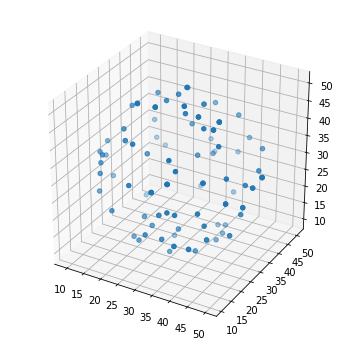

In [56]:
from mpl_toolkits.mplot3d import Axes3D

x = sphere[:,0]
y = sphere[:,1]
z = sphere[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z)

In [57]:
sphere.shape

(128, 3)